# PROYECTO INTELIGENCIA ARTIFICIAL

## Reconocimiento de genero por medio de voz

### integrantes:

* Hazel pinzon

* Mateo Orozco

* Nicolas Galvan

### Descripcion:
En este proyecto se utilizara un dataset que contiene las propiedades acusticas de la voz y speech, el dataset esta compuesto de 3,168 muestras de voz, recolectadas de hombres y mujeres.
Las muestras de voz fueron pre-procesadas mediante un analisis acustico en R usando los paquetes seewave y TuneR, con un rango de frecuencia de 0hz-280hz.(Rango de voz humana)

* meanfreq: mean frequency (in kHz)

* sd: standard deviation of frequency

* median: median frequency (in kHz)

* Q25: first quantile (in kHz)

* Q75: third quantile (in kHz)

* IQR: interquantile range (in kHz)

* skew: skewness (see note in specprop description)

* kurt: kurtosis (see note in specprop description)

* sp.ent: spectral entropy

* sfm: spectral flatness

* mode: mode frequency

* centroid: frequency centroid (see specprop)

* peakf: peak frequency (frequency with highest energy)

* meanfun: average of fundamental frequency measured across acoustic signal

* minfun: minimum fundamental frequency measured across acoustic signal

* maxfun: maximum fundamental frequency measured across acoustic signal

* meandom: average of dominant frequency measured across acoustic signal

* mindom: minimum of dominant frequency measured across acoustic signal

* maxdom: maximum of dominant frequency measured across acoustic signal

* dfrange: range of dominant frequency measured across acoustic signal

* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental

* frequencies divided by the frequency range

* label: male or female

El proyecto tiene como propósito la predicción del genero de una persona mediante una grabación de voz.

Se usaron varios clasificadores (naive bayes classifier, Support vector machine, decisión tree classifier y Random forest classifier) y además de redes neuronales poder hacer la clasificación del genero.



In [75]:

import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('voice.csv')

1.4.1


In [2]:
data.shape

(3168, 21)

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [5]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


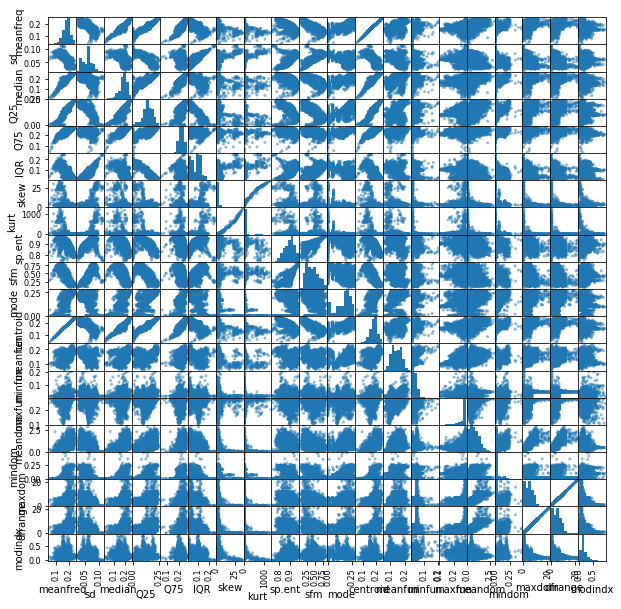

In [6]:
pd.plotting.scatter_matrix(data, figsize=(10,10));

## Eliminamos columnas para evitar redundancias

In [7]:
data2=data
del data2['maxdom']
del data2['centroid']


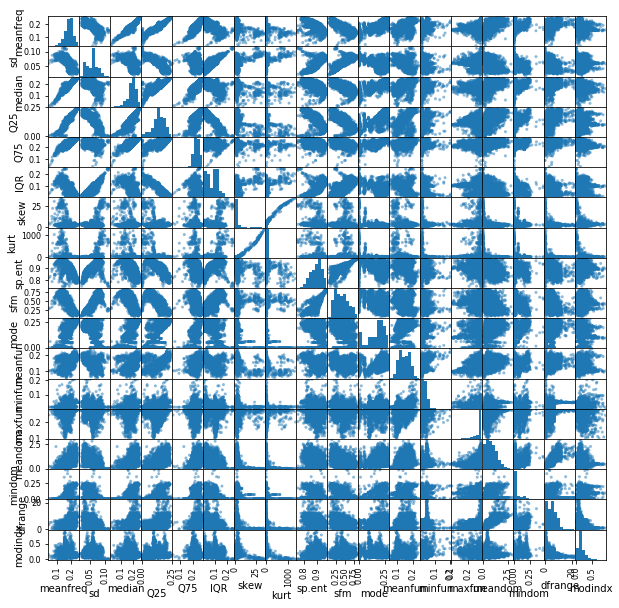

In [8]:
pd.plotting.scatter_matrix(data2, figsize=(10,10));

## Verificacion de que no existan datos nullos en el dataset

In [9]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Se observa el balance del dataset

In [143]:
print("Total de filas: {}".format(data.shape[0]))
print("Numero de hombres: {}".format(data[data.label == 'male'].shape[0]))
print("Numero de mujeres: {}".format(data[data.label == 'female'].shape[0]))

Total de filas: 3168
Numero de hombres: 1584
Numero de mujeres: 1584


## Se importan los clasificadores

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

## Permutamos el dataset y se cambia la clase de String a entero

In [145]:
data2 = np.random.permutation(data2)
X = data2[:,:-1]
y = data2[:,-1]
from sklearn.preprocessing import LabelEncoder
# Encode label category
# male -> 1
# female -> 0
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
print(y)

[1 0 0 ..., 0 0 1]


## Se dividen los datos 80% entrenamiento, 20 % para test

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,  random_state=0)
method_names = []
method_scores = []

## Normalizamos los datos

In [147]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Entrenamos y comparamos los clasificadores con los parametros por defecto

In [150]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
print("Decision Tree Classification Score: {}".format(DTC.score(X_test,y_test)))
method_names.append("DTC")
method_scores.append(DTC.score(X_test,y_test))


SVC=SVC() #Default hyperparameters
SVC.fit(X_train,y_train)
print("SVM Classification Score is: {}".format(SVC.score(X_test,y_test)))
method_names.append("SVM")
method_scores.append(SVC.score(X_test,y_test))


RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
print("Random Forest Classification Score: {}".format(RFC.score(X_test,y_test)))
method_names.append("RFC")
method_scores.append(RFC.score(X_test,y_test))

GNB=GaussianNB()
GNB.fit(X_train,y_train)
print("Naive Bayes Classification Score: {}".format(GNB.score(X_test,y_test)))
method_names.append("GNB")
method_scores.append(GNB.score(X_test,y_test))


Decision Tree Classification Score: 0.977917981073
SVM Classification Score is: 0.98738170347
Random Forest Classification Score: 0.984227129338
Naive Bayes Classification Score: 0.932176656151


## Grafico de barras del puntaje obtenido por cada clasificador

Text(0,0.5,u'Method Score')

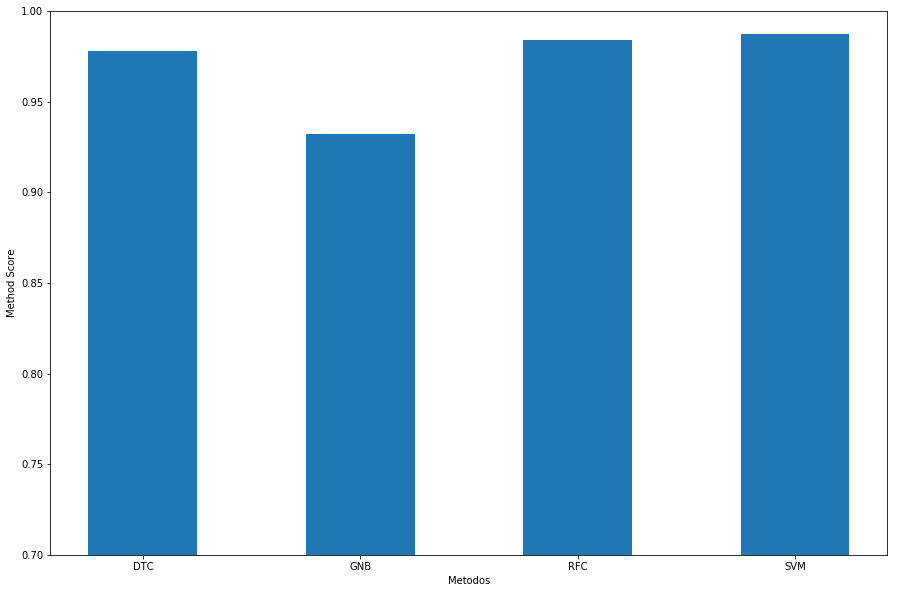

In [151]:
plt.figure(figsize=(15,10))
plt.ylim([0.70,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Metodos')
plt.ylabel('Method Score')

# Redes Neuronales

In [242]:
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=2)
print(y_train_ohe.shape, y_test_ohe.shape)

((2534, 2), (634, 2))


## Red Neuronal con 6 capas y entrenada con 20 epochs

In [243]:
model = keras.models.Sequential()
model.add(tf.keras.layers.Flatten( input_shape= X_train[0].shape))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))                     #softmax for multiple classes               
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 18)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 1000)              19000     
_________________________________________________________________
dense_72 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               128256    
_________________________________________________________________
dense_74 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 258       
Total params: 680,910
Trainable params: 680,910
Non-trainable params: 0
_________________________________________________________________


In [244]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train on 2534 samples, validate on 634 samples
Epoch 1/20
2534/2534 [==============================] - 3s - loss: 0.1536 - acc: 0.9475 - val_loss: 0.0608 - val_acc: 0.9811
Epoch 2/20
2534/2534 [==============================] - 1s - loss: 0.0769 - acc: 0.9718 - val_loss: 0.0582 - val_acc: 0.9890
Epoch 3/20
2534/2534 [==============================] - 1s - loss: 0.0617 - acc: 0.9795 - val_loss: 0.0530 - val_acc: 0.9842
Epoch 4/20
2534/2534 [==============================] - 2s - loss: 0.0547 - acc: 0.9826 - val_loss: 0.0511 - val_acc: 0.9811
Epoch 5/20
2534/2534 [==============================] - 2s - loss: 0.0550 - acc: 0.9818 - val_loss: 0.0578 - val_acc: 0.9858
Epoch 6/20
2534/2534 [==============================] - 2s - loss: 0.0451 - acc: 0.9805 - val_loss: 0.0547 - val_acc: 0.9748
Epoch 7/20
2534/2534 [==============================] - 1s - loss: 0.0514 - acc: 0.9822 - val_loss: 0.0648 - val_acc: 0.9826
Epoch 8/20
2534/2534 [==============================] - 1s - loss: 0.0516 - ac

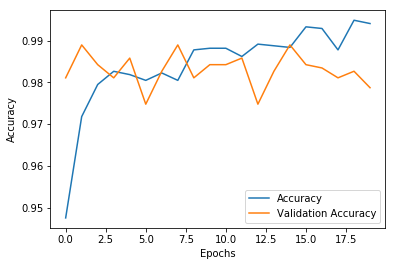

In [245]:
history = model.fit(X_train,
          y_train_ohe,
          epochs=20,
          validation_data=(X_test, y_test_ohe))

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [246]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

576/634 [==========================>...] - ETA: 0s('Test accuracy:', 0.97870662347751458, ' test_loss: ', 0.074918901711028094)


## Red Neuronal con 3 capas y 50 epochs

In [247]:
model2 = keras.models.Sequential()
model2.add(tf.keras.layers.Flatten( input_shape= X_train[0].shape))
model2.add(tf.keras.layers.Dense(1000, activation='relu'))
model2.add(tf.keras.layers.Dense(2, activation='sigmoid'))                     #softmax for multiple classes               
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 18)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 1000)              19000     
_________________________________________________________________
dense_77 (Dense)             (None, 2)                 2002      
Total params: 21,002
Trainable params: 21,002
Non-trainable params: 0
_________________________________________________________________


In [248]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train on 2534 samples, validate on 634 samples
Epoch 1/50
2534/2534 [==============================] - 1s - loss: 0.2713 - acc: 0.9027 - val_loss: 0.0867 - val_acc: 0.9787
Epoch 2/50
2534/2534 [==============================] - 0s - loss: 0.0937 - acc: 0.9704 - val_loss: 0.0608 - val_acc: 0.9819
Epoch 3/50
2534/2534 [==============================] - 0s - loss: 0.0771 - acc: 0.9745 - val_loss: 0.0524 - val_acc: 0.9834
Epoch 4/50
2534/2534 [==============================] - 0s - loss: 0.0704 - acc: 0.9755 - val_loss: 0.0540 - val_acc: 0.9826
Epoch 5/50
2534/2534 [==============================] - 0s - loss: 0.0665 - acc: 0.9767 - val_loss: 0.0519 - val_acc: 0.9842
Epoch 6/50
2534/2534 [==============================] - 0s - loss: 0.0609 - acc: 0.9787 - val_loss: 0.0498 - val_acc: 0.9842
Epoch 7/50
2534/2534 [==============================] - 0s - loss: 0.0568 - acc: 0.9820 - val_loss: 0.0483 - val_acc: 0.9842
Epoch 8/50
2534/2534 [==============================] - 0s - loss: 0.0573 - ac

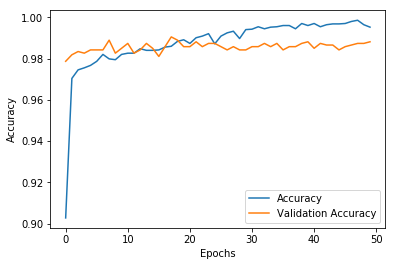

In [249]:
history = model2.fit(X_train,
          y_train_ohe,
          epochs=50,
          validation_data=(X_test, y_test_ohe))

plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [250]:
test_loss, test_acc = model2.evaluate(X_test, y_test_ohe)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

480/634 [=====================>........] - ETA: 0s('Test accuracy:', 0.98817034587499097, ' test_loss: ', 0.040414139478576111)


## Resultados

En este estudio al comparar los resultados de los cuatro clasificadores y las dos redes neuronales, pudimos comprobar que la máquina de soporte vectorial y Random Forest obtienen los mejores resultados entre clasificadores con 98.7% y 98.4% respectivamente, y la red neuronal con 3 capas y 50 epochs obtiene un puntaje superior con 98.8% en comparación a la red neuronal de 6 capas y 20 epochs.

Sin embargo, el clasificador con menor puntaje que en este caso es Naive Bayes, obtuvo 93.2% de precisión que sigue siendo un buen puntaje, pero está bastante alejado de la media en comparación al resto de puntajes, ya que tomando en cuenta los 4 clasificadores y las 2 redes neuronales se logra una media de 97,47%.  Se obtuvieron estos resultados tan acertados debido a el balance del dataset y el preprocesamiento de los datos, ya que adicionalmente estandarizamos los datos y seleccionamos las características más importantes para evitar redundancias.


## Trabajo Futuro


Desarrollar formas de hacer el producto eficiente en el uso practico,  proponiendo que el usuario tenga que decir una frase especifica para que el programa tenga que analizar en la base de datos esta frase y así se limite el análisis


## Concluciones

En este proyecto podemos concluir que tanto las redes neuronales como los clasificadores son viables ya que tienen un comportamiento muy similar y por lo tanto resultados similares.

También podemos concluir que tanto los clasificadores y las redes neuronales obtuvieron resultados muy elevados debido a que el dataset está perfectamente balanceado. Es decir, exactamente la mitad del dataset es de una clase y la otra mitad de la otra, además de que se realizó preprocesamiento de los datos.

Teniendo esto en cuenta. La clasificación con mayor puntaje y por lo tanto más idóneo para trabajar con este dataset es la red neuronal con 3 capas y 50 epochs, esta red neuronal cuenta con una capa de entrada, una capa densa de 1000 neuronas con la función de activación relu y una capa de salida con la función de activación sigmoide y se entrenó con 50 epochs. Obteniendo un puntaje de 98.81%.

La segunda alternativa es trabajar el dataset con SVM ya que logro un puntaje de 98.73% que es el segundo mejor puntaje logrado en este trabajo.
